# 13_poplar_optimal_nonbranching
Poplar - Optimal Simulation Configuration without Branching [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VlachosGroup/LigninGraphs/blob/master/docs/source/examples/13_poplar_optimal_nonbranching.ipynb)
<br/>Simulation poplar i_9

Install the package from pip (skip this step if the package is already installed)


In [ ]:
! pip install ligning

Import Code for Lignin Optimization

In [1]:
# set ligning path (optional if installed via pip)
import sys, os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..\..'))
sys.path.insert(0, project_path)

import ligning.optimization as opt
import ligning.characterization as ch
import ligning.utils as ut

Set the destination of simulation outputs. ResultsName sets the first level of storage, library_name specifies the folder within 'demo_results' and the trial_index is optional, specifying the test number. This allows data from multiple simulations to be stored, rather than overwriting past results, if no trial_index is given

In [2]:
ResultsName='demo_results'
library_name = 'poplar_nobranch'
trial_index=0

Set distribution of linkages<br>
This sets the expected frequency of each type of linkage between monomers. Setting to 0 will disable that linkage for the simulation. <br>
['4-O-5', 'alpha-O-4', 'beta-O-4', '5-5', 'beta-5', 'beta-beta', 'beta-1']

In [3]:
linkage_distribution_input = [0, 0, 78, 0.1, 7, 15, 0] 

Set monomer distributions<br>
This sets the expected frequency of each type of monomers. Setting to 0 will disable that monomer for the simulation. <br>
['H', 'G', 'S']

In [4]:
monomer_distribution_input = [0, 37, 63]

Setting for additional metrics in simulation output <br>
Verbose reports monomer additions to polymers. <br>
Additional_metrics reports population data such as branching coefficient in the simulation output.

In [5]:
verbose = False
additional_metrics = True

Set branching propensity of polymers <br>
Likelihood of a monomer linking to 3 or more neighboring monomers.

In [6]:
branching_propensity = 0

Set population metrics <br>
Determines the target monomer size for the simulation. <br>
['number average molecular weight', 'weight average molecular weight']

In [7]:
population_metrics = None

Additional setting for expectations the size of the polymer population, including the expected average size, maximum polymer size, and distribution of sizes of polymers.

In [8]:
expected_size = 7
max_size = 100

# size distribution scaling factor
distribution_scaling = 0.1

# size in MW
size_in_MW = False

Metropolis Temperatures <br>
The temperature for the Metropolis Monte Carlo in monomer addition (Tmetro) and polymer addition (Tmetro_out).

In [9]:
Tmetro = 10
Tmetro_out = 10

Simulation settings<br>
Maximum iterations for monomer addition to each polymer, polymer addition to the population, and ring addition to the population. N_population is the number of polymers in the population. Seed_init sets the random seed for the simulation.

In [10]:
i_max = 1000
i_max_out = 1000
i_max_ring = 500

n_population = 100

seed_init = 1

(Optional) Set metric weights<br>
13 metrics are available<br>
The first seven are linkage distributions: '4-O-5', 'alpha-O-4', 'beta-O-4', '5-5', 'beta-5', 'beta-beta', 'beta-1'<br>
The next three are monomer distributions: 'H', 'G', 'S'<br>
Then the branching coefficient <br>
Two optional, representing 'number average molecular weight' and 'weight average molecular weight', are not included for this simulation

Simulation produced the best results without providing metric weights

Create and run the simulation

Starting a new trial, No.0:



C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\polymer.py:662: UserWarning: Input linkage type is not supported
  warnings.warn("Input linkage type is not supported")


Runtime for creating all polymers : 12.40 minutes 



C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:616: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numerical_metrics = list(population_data.mean().index)
C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:617: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population_mean = np.array([population_data.mean()])
C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:618: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population

Target values:
{   '4-O-5': 0.0,
    '5-5': 0.0009990009990009992,
    'G': 0.37,
    'H': 0.0,
    'S': 0.63,
    'alpha-O-4': 0.0,
    'beta-1': 0.0,
    'beta-5': 0.06993006993006994,
    'beta-O-4': 0.7792207792207793,
    'beta-beta': 0.14985014985014986,
    'branching_coeff': 1.0}
Optimal simulated values:
{   '4-O-5': 0.0,
    '5-5': 0.0016835016835016834,
    'G': 0.38273381294964026,
    'H': 0.0,
    'MW': 1365.9700495049506,
    'MW_weighted': 1636.0500652238395,
    'S': 0.6172661870503597,
    'alpha-O-4': 0.0,
    'beta-1': 0.0,
    'beta-5': 0.03535353535353535,
    'beta-O-4': 0.867003367003367,
    'beta-beta': 0.09595959595959595,
    'branching_coeff': 0.0,
    'monomer_count': 6.881188118811881}

Acceptance Rates
Monomer Acceptance: 0.014760309221908328
Polymer Acceptance: 0.9351851851851852
Runtime for analyzing the results : 0.04 minutes 



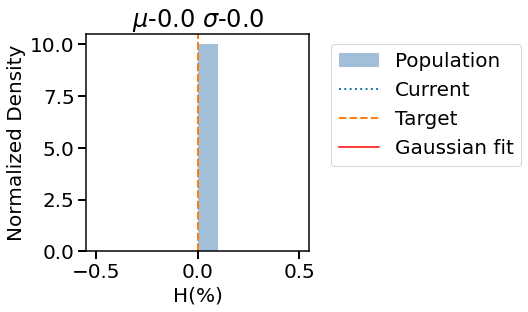

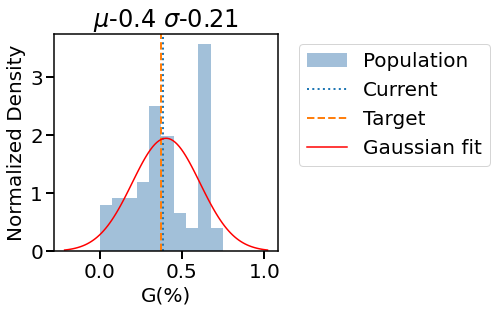

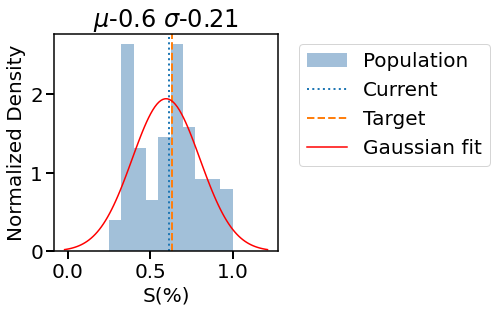

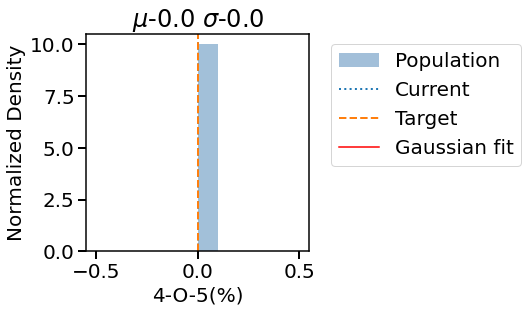

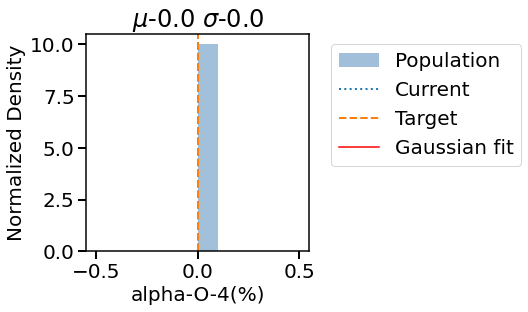

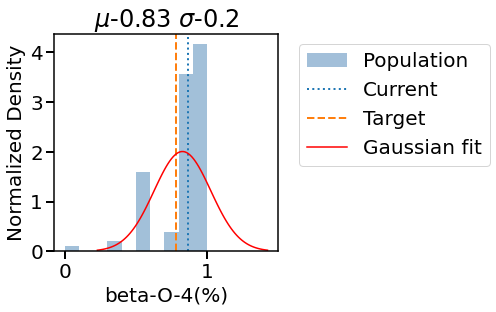

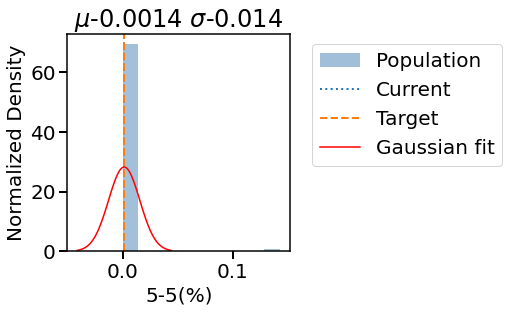

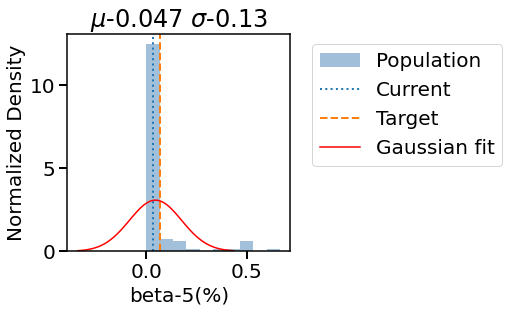

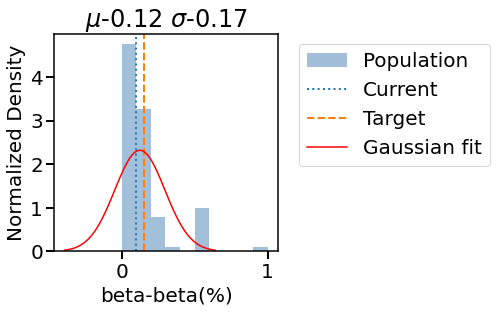

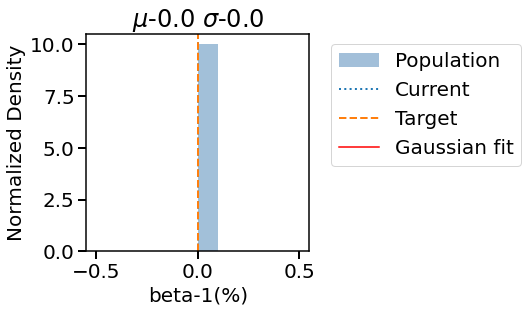

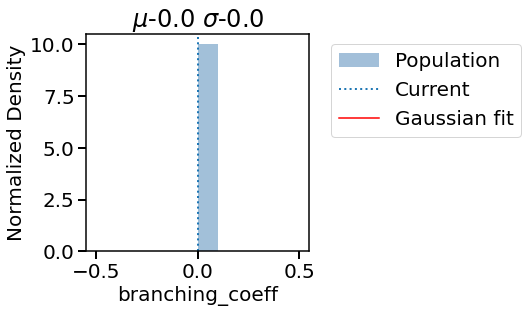

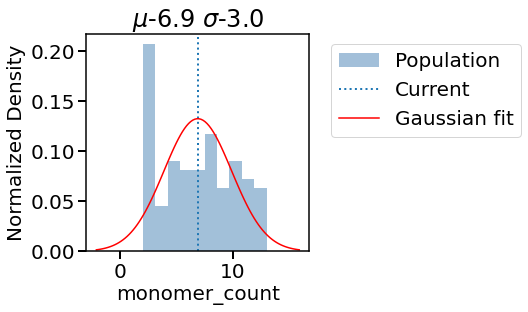

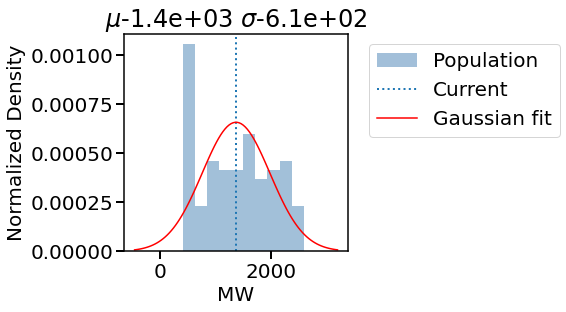

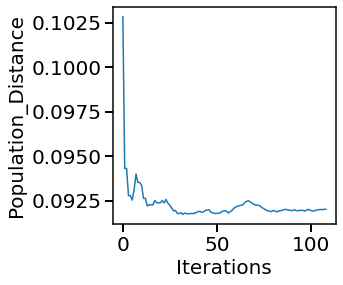

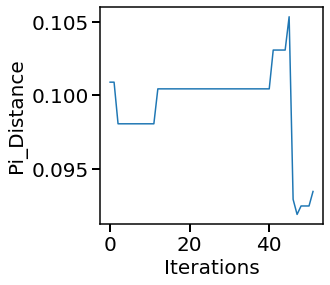

In [11]:
sim = opt.Simulation(linkage_distribution_input=linkage_distribution_input,
                     monomer_distribution_input=monomer_distribution_input,
                     expected_size=expected_size,
                     max_size=max_size,
                     distribution_scaling=distribution_scaling,
                     Tmetro=Tmetro,
                     Tmetro_out=Tmetro_out,
                     seed_init=seed_init,
                     ResultsName=ResultsName,
                     library_name=library_name,
                     n_population=n_population,
                     i_max=i_max,
                     i_max_out=i_max_out,
                     i_max_ring=i_max_ring,
                     additional_metrics=additional_metrics,
                     population_metrics=population_metrics,
                     size_in_MW=size_in_MW, 
                     branching_propensity=branching_propensity,
                     verbose=verbose)

sim.run()

Process Population

In [12]:
P_population = sim.P_population
population = ch.Population(P_population, name=library_name, ResultsName=ResultsName, TrialIndex=str(trial_index))
population.analyze()

C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:616: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numerical_metrics = list(population_data.mean().index)
C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:617: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population_mean = np.array([population_data.mean()])
C:\Users\jake_\Documents\GitHub\LigninGraphs\ligning\characterization.py:618: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population